In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [24]:
original_df = pd.read_csv('latest.csv', index_col=0).drop_duplicates()
col = list(original_df.columns)
col.remove('Link')
col.append('Link')
original_df = original_df[col]
find_df = pd.read_csv('latest.csv', index_col=0, dtype=str).drop_duplicates()
for i in find_df.columns:
    find_df[i] = find_df[i].str.lower()

In [25]:
original_df

,Name,Score rank,Popularity rank,Score,Episodes,Type,Premiered,English name,Japanese name,Synonyms,...,Members score 9,Members score 8,Members score 7,Members score 6,Members score 5,Members score 4,Members score 3,Members score 2,Members score 1,Link
0,Fullmetal Alchemist: Brotherhood,1.0,3,9.17,64.0,TV,Spring 2009,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",...,435910.0,217701.0,77068.0,22249.0,10285.0,3601.0,1707.0,2292.0,18197.0,https://myanimelist.net/anime/5114/Fullmetal_A...
1,Shingeki no Kyojin Season 3 Part 2,2.0,45,9.11,10.0,TV,Spring 2019,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,NaN,...,302094.0,139059.0,42323.0,10533.0,3689.0,1411.0,703.0,530.0,6059.0,https://myanimelist.net/anime/38524/Shingeki_n...
2,Steins;Gate,3.0,10,9.10,24.0,TV,Spring 2011,Steins;Gate,STEINS;GATE,NaN,...,297881.0,152722.0,62782.0,23231.0,12093.0,5571.0,2565.0,1945.0,5912.0,https://myanimelist.net/anime/9253/Steins_Gate
3,Gintama°,4.0,336,9.09,51.0,TV,Spring 2015,Gintama Season 4,銀魂°,Gintama' (2015),...,41129.0,23333.0,11370.0,4257.0,2499.0,1015.0,687.0,1162.0,4788.0,https://myanimelist.net/anime/28977/Gintama°
4,Hunter x Hunter (2011),5.0,11,9.07,148.0,TV,Fall 2011,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,HxH (2011),...,349522.0,194297.0,76366.0,21628.0,9245.0,3334.0,1443.0,1185.0,4985.0,https://myanimelist.net/anime/11061/Hunter_x_H...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17866,Kazoku: Haha to Shimai no Kyousei,NaN,11872,NaN,NaN,OVA,NaN,NaN,家属 ~母と姉妹の嬌声~,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://myanimelist.net/anime/48422/Kazoku__Ha...
17867,Konbini Shoujo Z,NaN,13044,NaN,NaN,OVA,NaN,NaN,コンビニ少女Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://myanimelist.net/anime/42383/Konbini_Sh...
17868,Mako-chan Kaihatsu Nikki,NaN,13204,NaN,2.0,OVA,NaN,NaN,まこちゃん開発日記,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://myanimelist.net/anime/48698/Mako-chan_...
17869,Maou Evelogia ni Mi wo Sasage yo,NaN,10148,NaN,NaN,Unknown,NaN,NaN,魔王イブロギアに身を捧げよ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://myanimelist.net/anime/47792/Maou_Evelo...


In [26]:
percent_df = original_df.copy()[['Members score 10', 'Members score 9', 'Members score 8', 'Members score 7',
                                'Members score 6', 'Members score 5', 'Members score 4', 'Members score 3',
                                'Members score 2', 'Members score 1']]



In [27]:
percent_df

,Members score 10,Members score 9,Members score 8,Members score 7,Members score 6,Members score 5,Members score 4,Members score 3,Members score 2,Members score 1
0,766948.0,435910.0,217701.0,77068.0,22249.0,10285.0,3601.0,1707.0,2292.0,18197.0
1,419221.0,302094.0,139059.0,42323.0,10533.0,3689.0,1411.0,703.0,530.0,6059.0
2,499900.0,297881.0,152722.0,62782.0,23231.0,12093.0,5571.0,2565.0,1945.0,5912.0
3,84738.0,41129.0,23333.0,11370.0,4257.0,2499.0,1015.0,687.0,1162.0,4788.0
4,508513.0,349522.0,194297.0,76366.0,21628.0,9245.0,3334.0,1443.0,1185.0,4985.0
...,...,...,...,...,...,...,...,...,...,...
17866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
path = '1nan.png'
path[1:-4]

'nan'

In [29]:
def make_df(find):
    return original_df.loc[find_df['Name'].str.contains(find) | find_df['Score rank'].isin([find]) |
                           find_df['Popularity rank'].isin([find]) | find_df['Score'].isin([find]) |
                           find_df['Episodes'].isin([find]) | find_df['Type'].str.contains(find) |
                           find_df['Premiered'].str.contains(find) | find_df['English name'].str.contains(find) |
                           find_df['Japanese name'].str.contains(find) | find_df['Synonyms'].str.contains(find) |
                           find_df['Status'].str.contains(find) | find_df['Aired'].str.contains(find) |
                           find_df['Broadcast'].str.contains(find) | find_df['Producers'].str.contains(find) |
                           find_df['Licensors'].str.contains(find) | find_df['Studios'].str.contains(find) |
                           find_df['Source'].str.contains(find) | find_df['Genres'].str.contains(find) |
                           find_df['Duration'].str.contains(find) | find_df['Rating'].str.contains(find)]

<ipython-input-38-cdf1cbf966ec>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


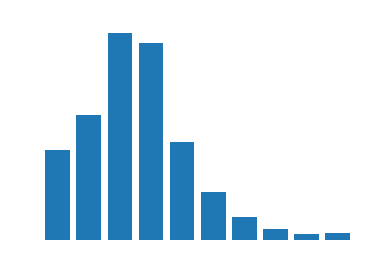

In [38]:
df = make_df(path[1:-4])
params = {"ytick.color": "w",
          "xtick.color": "w",
          "axes.labelcolor": "w",
          "axes.edgecolor": "w"}
# plt.rcParams.update(params)
fig, ax = plt.subplots()
# df1 = pd.DataFrame({'Score': ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
#                     'val': [df['Members score 10'].sum(), df['Members score 9'].sum(),
#                             df['Members score 8'].sum(), df['Members score 7'].sum(),
#                             df['Members score 6'].sum(), df['Members score 5'].sum(),
#                             df['Members score 4'].sum(), df['Members score 3'].sum(),
#                             df['Members score 2'].sum(), df['Members score 1'].sum(), ]})
ax.bar(['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
    [df['Members score 10'].sum(), df['Members score 9'].sum(),
                            df['Members score 8'].sum(), df['Members score 7'].sum(),
                            df['Members score 6'].sum(), df['Members score 5'].sum(),
                            df['Members score 4'].sum(), df['Members score 3'].sum(),
                            df['Members score 2'].sum(), df['Members score 1'].sum(), ])
# ax = df1.plot.bar(x='Score', y='val', rot=0)
ax.set_title(f'По количеству оценок', color='w')
# plt.savefig(f'static/pictures/{path}', transparent=True)
# fig.savefig(f'static/pictures/{path}', transparent=True)
fig.show()